In [1]:
!unzip "testing-imdb-score-prediction (1).zip" -d "data"

Archive:  testing-imdb-score-prediction (1).zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [54]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as pt
import pandas as pd
from sklearn.metrics import r2_score


In [6]:
dt=pd.read_csv("data/train.csv")

In [7]:
dt.head()


,Id,x,Expected,Usage
0,1466,4.9542,0.000023,Public
1,6,3.1229,0.023814,Public
2,4515,4.9924,0.000019,Public
3,513,0.9633,0.605704,Public
4,5950,2.5078,0.108054,Public


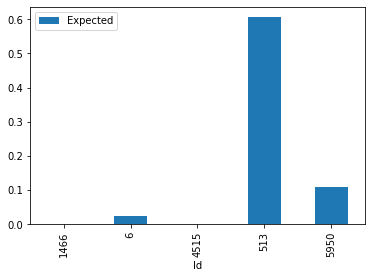

In [43]:
dt.head().plot("Id","Expected",kind="bar");

In [17]:
dt['x'].value_counts()

0.1772    1
0.5277    1
5.6978    1
1.1445    1
9.6565    1
         ..
6.3989    1
8.4641    1
8.2234    1
3.2421    1
3.8125    1
Name: x, Length: 6500, dtype: int64

In [16]:
dt['Usage'].value_counts()

Public    6500
Name: Usage, dtype: int64

In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        6500 non-null   int64  
 1   x         6500 non-null   float64
 2   Expected  6500 non-null   float64
 3   Usage     6500 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 203.2+ KB


In [12]:
dt.isna().sum()

Id          0
x           0
Expected    0
Usage       0
dtype: int64

In [13]:
dt['Usage']

0       Public
1       Public
2       Public
3       Public
4       Public
         ...  
6495    Public
6496    Public
6497    Public
6498    Public
6499    Public
Name: Usage, Length: 6500, dtype: object

In [22]:
x=dt.drop("Expected",axis=1)

In [23]:
x=x.drop("Usage",axis=1)
x

,Id,x
0,1466,4.9542
1,6,3.1229
2,4515,4.9924
3,513,0.9633
4,5950,2.5078
...,...,...
6495,822,2.0394
6496,8367,1.6951
6497,2752,7.7058
6498,4385,2.6081


In [24]:
y=dt["Expected"]

In [25]:
y

0       2.318945e-05
1       2.381380e-02
2       1.932498e-05
3       6.057040e-01
4       1.080540e-01
            ...     
6495    2.548907e-01
6496    4.029510e-01
6497    9.834560e-13
6498    8.694576e-02
6499    1.378461e-13
Name: Expected, Length: 6500, dtype: float64

In [35]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
xpt=model.predict(x_test)

In [55]:
r2_score(y_test,xpt)

0.999994340049186

In [50]:
y

0       2.318945e-05
1       2.381380e-02
2       1.932498e-05
3       6.057040e-01
4       1.080540e-01
            ...     
6495    2.548907e-01
6496    4.029510e-01
6497    9.834560e-13
6498    8.694576e-02
6499    1.378461e-13
Name: Expected, Length: 6500, dtype: float64

In [51]:
xpt

array([6.06314173e-01, 7.59360990e-05, 5.57040949e-01, ...,
       7.59360990e-05, 7.59360990e-05, 7.59360990e-05])

In [52]:
type(y_test)

pandas.core.series.Series

In [53]:
model.score(x_test,y_test)

0.9999943400491859

In [62]:
def full_train(x,y):
    np.random.seed(42)
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    model=RandomForestRegressor()
    model.fit(x,y)
    return model

In [63]:
Model=full_train(x,y)

In [64]:
test=pd.read_csv("data/test.csv")

In [66]:
yp=Model.predict(test)

In [67]:
df=pd.DataFrame({"Id":test["Id"],"Predicted":yp})


In [70]:
df.to_csv("data/Submission.csv",index=False)